In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from tqdm import tqdm
import pop_tools

def pop_find_lat_ind(loc, LATDAT):
    return np.abs(LATDAT[:, 0].values - loc).argmin()

def pop_find_lon_ind(loc, LONDAT, direction="w"):
    if direction.lower() in ["east", "e"]:
        value = loc
    elif direction.lower() in ["west", "w"]:
        value = 360 - loc
    else:
        print("I do not know which direction.")
    return np.nanargmin(np.abs(LONDAT[0, :].values - value))


In [2]:
# open sample data
ds_dia = xr.open_dataset('E:\\NCAR\\01.DIA.nc')
ds_hdifb = xr.open_dataset('E:\\NCAR\\01.HDIFB.nc')
ds_hdife = xr.open_dataset('E:\\NCAR\\01.HDIFE.nc')
ds_hdifn = xr.open_dataset('E:\\NCAR\\01.HDIFN.nc')
ds_kpp = xr.open_dataset('E:\\NCAR\\01.KPP.nc')
ds_qsw = xr.open_dataset('E:\\NCAR\\01.QSW.nc')
ds_shf = xr.open_dataset('E:\\NCAR\\01.SHF.nc')
ds_shf_qsw = xr.open_dataset('E:\\NCAR\\01.SHF_QSW.nc')
ds_uet = xr.open_dataset('E:\\NCAR\\01.UET.nc')
ds_vnt = xr.open_dataset('E:\\NCAR\\01.VNT.nc')
ds_wtt = xr.open_dataset('E:\\NCAR\\01.WTT.nc')
ds_temp = xr.open_dataset('E:\\NCAR\\01.TEMP.nc')
ds_temp1 = xr.open_dataset('E:\\NCAR\\TEMP\\b.e11.BRCP85C5CNBDRD.f09_g16.001.pop.h.TEMP.208101-210012.nc')

In [3]:
# get lola inds from somewhere for indexing later on
lola_inds = {}
inds_lat = range(-89, 90, 1)
for j in inds_lat:
    if j < 0:
        lola_inds["j_" + str(j)[1:] + "s"] = pop_find_lat_ind(j, ds_temp.TLAT)
    else:
        lola_inds["j_" + str(j) + "n"] = pop_find_lat_ind(j, ds_temp.TLAT)

inds_lon = range(0, 360, 1)
for i in inds_lon:
    lola_inds["i_" + str(i) + "_w"] = pop_find_lon_ind(i, ds_temp.TLONG)

In [4]:
DZT = np.zeros((60,384,320))
for k in range(60):
            DZT[k,:,:] = ds_temp.dz[k]

ds2 = xr.Dataset()
ds2 = xr.Dataset({'DZT': (['z_t','nlat','nlon',], DZT.data),
                   'DZU': (['z_t','nlat','nlon'], DZT.data)},
                    coords={'TLAT': (['nlat','nlon'],ds_temp.TLAT.data),
                            'TLONG': (['nlat','nlon'],ds_temp.TLONG.data),
                            'ULAT': (['nlat','nlon'],ds_temp.ULAT.data),
                            'ULONG': (['nlat','nlon'],ds_temp.ULONG.data),
                            'z_t': (['z_t'],ds_temp.z_t.data)})

In [18]:
dzt = np.zeros((60,384,320))

for k in range(60):
            dzt[k,:,:] = ds_temp.dz[k]

In [19]:
lon = (ds_temp['TLONG'].values)
lat = (ds_temp['TLAT'].values)
z_t = ds_temp['z_t'].values

DZT = xr.DataArray(
    data=dzt,
    dims=["z_t","nlat", "nlon"],
    coords=dict(
        lon=(["nlat", "nlon"], lon),
        lat=(["nlat", "nlon"], lat),
        z_t=z_t,
    ),
    attrs=dict(
        description="DZU.",
        units="cenm",
    ),
)

DZU = xr.DataArray(
    data=dzt,
    dims=["z_t","nlat", "nlon"],
    coords=dict(
        lon=(["nlat", "nlon"], lon),
        lat=(["nlat", "nlon"], lat),
        z_t=z_t,
    ),
    attrs=dict(
        description="DZT.",
        units="cenm",
    ),
)

In [11]:
ds_dia["DZT"] = ds2.DZT
ds_dia["DZU"] = ds2.DZU

ds_dia.DZT.attrs["long_name"] = "Thickness of T cells"
ds_dia.DZT.attrs["units"] = "centimeter"
ds_dia.DZT.attrs["grid_loc"] = "3111"
ds_dia.DZU.attrs["long_name"] = "Thickness of U cells"
ds_dia.DZU.attrs["units"] = "centimeter"
ds_dia.DZU.attrs["grid_loc"] = "3221"

ds_hdifb["DZT"] = ds2.DZT
ds_hdifb["DZU"] = ds2.DZU

ds_hdifb.DZT.attrs["long_name"] = "Thickness of T cells"
ds_hdifb.DZT.attrs["units"] = "centimeter"
ds_hdifb.DZT.attrs["grid_loc"] = "3111"
ds_hdifb.DZU.attrs["long_name"] = "Thickness of U cells"
ds_hdifb.DZU.attrs["units"] = "centimeter"
ds_hdifb.DZU.attrs["grid_loc"] = "3221"

ds_hdife["DZT"] = ds2.DZT
ds_hdife["DZU"] = ds2.DZU

ds_hdife.DZT.attrs["long_name"] = "Thickness of T cells"
ds_hdife.DZT.attrs["units"] = "centimeter"
ds_hdife.DZT.attrs["grid_loc"] = "3111"
ds_hdife.DZU.attrs["long_name"] = "Thickness of U cells"
ds_hdife.DZU.attrs["units"] = "centimeter"
ds_hdife.DZU.attrs["grid_loc"] = "3221"

ds_hdifn["DZT"] = ds2.DZT
ds_hdifn["DZU"] = ds2.DZU

ds_hdifn.DZT.attrs["long_name"] = "Thickness of T cells"
ds_hdifn.DZT.attrs["units"] = "centimeter"
ds_hdifn.DZT.attrs["grid_loc"] = "3111"
ds_hdifn.DZU.attrs["long_name"] = "Thickness of U cells"
ds_hdifn.DZU.attrs["units"] = "centimeter"
ds_hdifn.DZU.attrs["grid_loc"] = "3221"

ds_kpp["DZT"] = ds2.DZT
ds_kpp["DZU"] = ds2.DZU

ds_kpp.DZT.attrs["long_name"] = "Thickness of T cells"
ds_kpp.DZT.attrs["units"] = "centimeter"
ds_kpp.DZT.attrs["grid_loc"] = "3111"
ds_kpp.DZU.attrs["long_name"] = "Thickness of U cells"
ds_kpp.DZU.attrs["units"] = "centimeter"
ds_kpp.DZU.attrs["grid_loc"] = "3221"

ds_qsw["DZT"] = ds2.DZT
ds_qsw["DZU"] = ds2.DZU

ds_qsw.DZT.attrs["long_name"] = "Thickness of T cells"
ds_qsw.DZT.attrs["units"] = "centimeter"
ds_qsw.DZT.attrs["grid_loc"] = "3111"
ds_qsw.DZU.attrs["long_name"] = "Thickness of U cells"
ds_qsw.DZU.attrs["units"] = "centimeter"
ds_qsw.DZU.attrs["grid_loc"] = "3221"

ds_shf["DZT"] = ds2.DZT
ds_shf["DZU"] = ds2.DZU

ds_shf.DZT.attrs["long_name"] = "Thickness of T cells"
ds_shf.DZT.attrs["units"] = "centimeter"
ds_shf.DZT.attrs["grid_loc"] = "3111"
ds_shf.DZU.attrs["long_name"] = "Thickness of U cells"
ds_shf.DZU.attrs["units"] = "centimeter"
ds_shf.DZU.attrs["grid_loc"] = "3221"

ds_shf_qsw["DZT"] = ds2.DZT
ds_shf_qsw["DZU"] = ds2.DZU

ds_shf_qsw.DZT.attrs["long_name"] = "Thickness of T cells"
ds_shf_qsw.DZT.attrs["units"] = "centimeter"
ds_shf_qsw.DZT.attrs["grid_loc"] = "3111"
ds_shf_qsw.DZU.attrs["long_name"] = "Thickness of U cells"
ds_shf_qsw.DZU.attrs["units"] = "centimeter"
ds_shf_qsw.DZU.attrs["grid_loc"] = "3221"

ds_uet["DZT"] = ds2.DZT
ds_uet["DZU"] = ds2.DZU

ds_uet.DZT.attrs["long_name"] = "Thickness of T cells"
ds_uet.DZT.attrs["units"] = "centimeter"
ds_uet.DZT.attrs["grid_loc"] = "3111"
ds_uet.DZU.attrs["long_name"] = "Thickness of U cells"
ds_uet.DZU.attrs["units"] = "centimeter"
ds_uet.DZU.attrs["grid_loc"] = "3221"

ds_vnt["DZT"] = ds2.DZT
ds_vnt["DZU"] = ds2.DZU

ds_vnt.DZT.attrs["long_name"] = "Thickness of T cells"
ds_vnt.DZT.attrs["units"] = "centimeter"
ds_vnt.DZT.attrs["grid_loc"] = "3111"
ds_vnt.DZU.attrs["long_name"] = "Thickness of U cells"
ds_vnt.DZU.attrs["units"] = "centimeter"
ds_vnt.DZU.attrs["grid_loc"] = "3221"

ds_wtt["DZT"] = ds2.DZT
ds_wtt["DZU"] = ds2.DZU

ds_wtt.DZT.attrs["long_name"] = "Thickness of T cells"
ds_wtt.DZT.attrs["units"] = "centimeter"
ds_wtt.DZT.attrs["grid_loc"] = "3111"
ds_wtt.DZU.attrs["long_name"] = "Thickness of U cells"
ds_wtt.DZU.attrs["units"] = "centimeter"
ds_wtt.DZU.attrs["grid_loc"] = "3221"

ds_temp["DZT"] = ds2.DZT
ds_temp["DZU"] = ds2.DZU

ds_temp.DZT.attrs["long_name"] = "Thickness of T cells"
ds_temp.DZT.attrs["units"] = "centimeter"
ds_temp.DZT.attrs["grid_loc"] = "3111"
ds_temp.DZU.attrs["long_name"] = "Thickness of U cells"
ds_temp.DZU.attrs["units"] = "centimeter"
ds_temp.DZU.attrs["grid_loc"] = "3221"

ds_temp1["DZT"] = ds2.DZT
ds_temp1["DZU"] = ds2.DZU

ds_temp1.DZT.attrs["long_name"] = "Thickness of T cells"
ds_temp1.DZT.attrs["units"] = "centimeter"
ds_temp1.DZT.attrs["grid_loc"] = "3111"
ds_temp1.DZU.attrs["long_name"] = "Thickness of U cells"
ds_temp1.DZU.attrs["units"] = "centimeter"
ds_temp1.DZU.attrs["grid_loc"] = "3221"

In [6]:
# make sure we have the cell volumne for calculations
VOL = (ds_temp.DZT * ds_temp.DXT * ds_temp.DYT).compute()
KMT = ds_temp.KMT.compute()

for j in tqdm(range(len(KMT.nlat))):
    for i in range(len(KMT.nlon)):
        k = KMT.values[j, i].astype(int)
        VOL.values[k:, j, i] = 0.0


100%|██████████████████████████████████████████████████████████████████████████████| 384/384 [00:00<00:00, 1606.71it/s]


In [7]:
ds_temp["VOL"] = VOL

ds_temp.VOL.attrs["long_name"] = "volume of T cells"
ds_temp.VOL.attrs["units"] = "centimeter^3"
ds_temp.VOL.attrs["grid_loc"] = "3111"

In [ ]:
pop_tools.to_xgcm_grid_dataset

In [8]:
%%time
budget = xr.Dataset()
metrics = {
    ("X",): ["DXU", "DXT"],  # X distances
    ("Y",): ["DYU", "DYT"],  # Y distances
    ("Z",): ["DZU", "DZT"],  # Z distances
    ("X", "Y"): ["UAREA", "TAREA"],
}
gridxgcm_dia, dsxgcm_dia = pop_tools.to_xgcm_grid_dataset(
    ds_dia,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_dia.coords:
        dsxgcm_dia = dsxgcm_dia.drop_vars(coord)
        
gridxgcm_hdifb, dsxgcm_hdifb = pop_tools.to_xgcm_grid_dataset(
    ds_hdifb,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_hdifb.coords:
        dsxgcm_hdifb = dsxgcm_hdifb.drop_vars(coord)        
        
gridxgcm_hdife, dsxgcm_hdife = pop_tools.to_xgcm_grid_dataset(
    ds_hdife,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_hdife.coords:
        dsxgcm_hdife = dsxgcm_hdife.drop_vars(coord)        
        
        
gridxgcm_hdifn, dsxgcm_hdifn = pop_tools.to_xgcm_grid_dataset(
    ds_hdifn,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_hdifn.coords:
        dsxgcm_hdifn = dsxgcm_hdifn.drop_vars(coord)        
        
        
gridxgcm_kpp, dsxgcm_kpp = pop_tools.to_xgcm_grid_dataset(
    ds_kpp,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_kpp.coords:
        dsxgcm_kpp = dsxgcm_kpp.drop_vars(coord)        
        
gridxgcm_qsw, dsxgcm_qsw = pop_tools.to_xgcm_grid_dataset(
    ds_qsw,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_qsw.coords:
        dsxgcm_qsw = dsxgcm_qsw.drop_vars(coord)       

gridxgcm_shf, dsxgcm_shf = pop_tools.to_xgcm_grid_dataset(
    ds_shf,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_shf.coords:
        dsxgcm_shf = dsxgcm_shf.drop_vars(coord) 
        
gridxgcm_shf_qsw, dsxgcm_shf_qsw = pop_tools.to_xgcm_grid_dataset(
    ds_shf_qsw,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_shf_qsw.coords:
        dsxgcm_shf_qsw = dsxgcm_shf_qsw.drop_vars(coord) 

gridxgcm_uet, dsxgcm_uet = pop_tools.to_xgcm_grid_dataset(
    ds_uet,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_uet.coords:
        dsxgcm_uet = dsxgcm_uet.drop_vars(coord) 
        
gridxgcm_vnt, dsxgcm_vnt = pop_tools.to_xgcm_grid_dataset(
    ds_vnt,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_vnt.coords:
        dsxgcm_vnt = dsxgcm_vnt.drop_vars(coord) 
        
gridxgcm_wtt, dsxgcm_wtt = pop_tools.to_xgcm_grid_dataset(
    ds_wtt,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_wtt.coords:
        dsxgcm_wtt = dsxgcm_wtt.drop_vars(coord) 
        
        
gridxgcm_temp, dsxgcm_temp = pop_tools.to_xgcm_grid_dataset(
    ds_temp,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_temp.coords:
        dsxgcm_temp = dsxgcm_temp.drop_vars(coord) 

CPU times: total: 8.02 s
Wall time: 10.4 s


In [12]:
gridxgcm_temp1, dsxgcm_temp1 = pop_tools.to_xgcm_grid_dataset(
    ds_temp1,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_temp1.coords:
        dsxgcm_temp1 = dsxgcm_temp1.drop_vars(coord) 

In [9]:
%%time
budget["UET"] = -(gridxgcm_uet.diff(dsxgcm_uet.UET * dsxgcm_temp.VOL.values, axis="X") / dsxgcm_temp.VOL)
budget["VNT"] = -(gridxgcm_vnt.diff(dsxgcm_vnt.VNT * dsxgcm_temp.VOL.values, axis="Y") / dsxgcm_temp.VOL)
budget["WTT"] = (
    gridxgcm_wtt.diff(dsxgcm_wtt.WTT.fillna(0) * (dsxgcm_temp.dz * dsxgcm_temp.DXT * dsxgcm_temp.DYT).values, axis="Z")
    / dsxgcm_temp.VOL
)

budget["TOT_ADV"] = budget["UET"] + budget["VNT"] + budget["WTT"]

CPU times: total: 3 s
Wall time: 2.99 s


In [14]:
%%time
budget["DIA_IMPVF_TEMP"] = -(
    gridxgcm_dia.diff(dsxgcm_dia.DIA_IMPVF_TEMP * dsxgcm_temp.TAREA, axis="Z") / dsxgcm_temp.VOL
)

# set surface flux at 0th layer
SRF_TEMP_FLUX = (dsxgcm_shf.SHF - dsxgcm_shf_qsw.SHF_QSW) * dsxgcm_temp1.hflux_factor

budget["DIA_IMPVF_TEMP"][:, 0, :, :] = (
    SRF_TEMP_FLUX * dsxgcm_temp.TAREA - dsxgcm_dia.DIA_IMPVF_TEMP.isel(z_w_bot=0) * dsxgcm_temp.TAREA
) / dsxgcm_temp.VOL.values[0, :, :]

budget["KPP_SRC_TMP"] = dsxgcm_kpp.KPP_SRC_TEMP
budget["VDIF"] = budget["DIA_IMPVF_TEMP"] + budget["KPP_SRC_TMP"]

CPU times: total: 1.05 s
Wall time: 1.04 s


In [16]:
%%time
budget["HDIFE_TEMP"] = gridxgcm_hdife.diff(dsxgcm_hdife.HDIFE_TEMP * dsxgcm_temp.VOL.values, axis="X") / dsxgcm_temp.VOL
budget["HDIFN_TEMP"] = gridxgcm_hdifn.diff(dsxgcm_hdifn.HDIFN_TEMP * dsxgcm_temp.VOL.values, axis="Y") / dsxgcm_temp.VOL
budget["HDIFB_TEMP"] = -gridxgcm_hdifb.diff(dsxgcm_hdifb.HDIFB_TEMP * dsxgcm_temp.VOL.values, axis="Z") / dsxgcm_temp.VOL
budget["HDIFB_TEMP"][:, 0, :, :] = -dsxgcm_hdifb.HDIFB_TEMP.isel(z_w_bot=0)

budget["HDIF"] = budget["HDIFE_TEMP"] + budget["HDIFN_TEMP"] + budget["HDIFB_TEMP"]
#budget['TEND_TEMP'] = dsxgcm.TEND_TEMP
#budget['RF_TEND_TEMP'] = dsxgcm.RF_TEND_TEMP

CPU times: total: 2.64 s
Wall time: 2.65 s


In [33]:
budget["QSW_3D"] = -gridxgcm_qsw.diff((dsxgcm_qsw.QSW_3D * dsxgcm_temp1.hflux_factor), axis="Z") / dsxgcm_temp.DZT

In [32]:
#budget['TEND_TEMP'] = gridxgcm_temp.diff(dsxgcm_temp.TEMP,axis='')/3600*24*30;

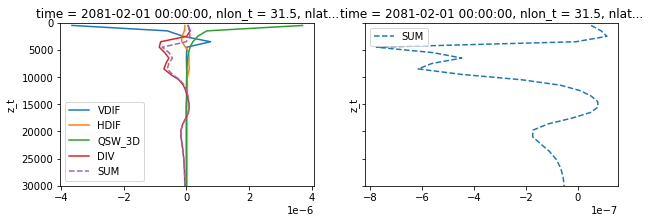

In [24]:
subset_ctl = budget.isel(nlon_t=31, nlat_t=190, time=0)

fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

# plot individual components
subset_ctl.VDIF.plot(y="z_t", ylim=(300e2, 0), label="VDIF", ax=ax[0])
subset_ctl.HDIF.plot(y="z_t", ylim=(300e2, 0), label="HDIF", ax=ax[0])
subset_ctl.QSW_3D.plot(y="z_t", ylim=(300e2, 0), label="QSW_3D", ax=ax[0])
subset_ctl.TOT_ADV.plot(y="z_t", ylim=(300e2, 0), label="DIV", ax=ax[0])

# plot sum
(subset_ctl.QSW_3D + subset_ctl.HDIF + subset_ctl.VDIF + subset_ctl.TOT_ADV).plot(
    y="z_t", ylim=(300e2, 0), label="SUM", ls="--", ax=ax[0]
)
# plot tendency
#subset_ctl.TEND_TEMP.plot(y="z_t", ylim=(300e2, 0), label="TEND_TEMP", ax=ax[0])

ax[0].legend()

# plot sum
(subset_ctl.QSW_3D + subset_ctl.HDIF + subset_ctl.VDIF + subset_ctl.TOT_ADV).plot(
    y="z_t", ylim=(300e2, 0), label="SUM", ls="--", ax=ax[1]
)
# plot tendency
#subset_ctl.TEND_TEMP.plot(y="z_t", ylim=(300e2, 0), label="TEND_TEMP", ax=ax[1])

ax[1].legend()